## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

In [2]:
boston_features

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,21.0,391.99,9.67,0,0,0,1,0,0,0
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,21.0,396.90,9.08,0,0,0,1,0,0,0
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,21.0,396.90,5.64,0,0,0,1,0,0,0
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,21.0,393.45,6.48,0,0,0,1,0,0,0


In [5]:
boston_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]', 'TAX_(250, 300]',
       'TAX_(300, 360]', 'TAX_(360, 460]', 'TAX_(460, 712]'],
      dtype='object')

## Look at the histograms for the continuous variables

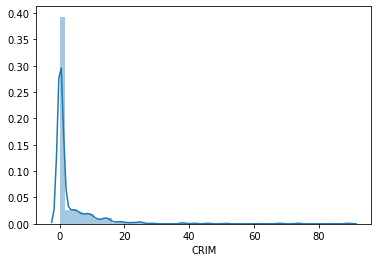

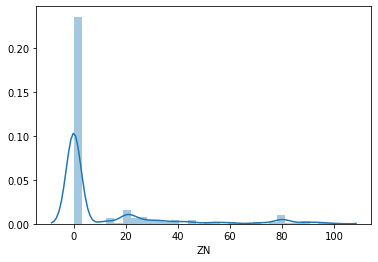

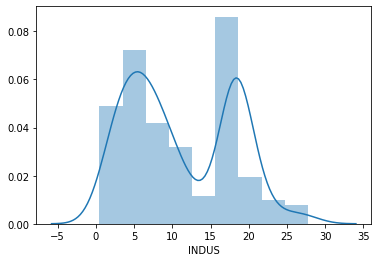

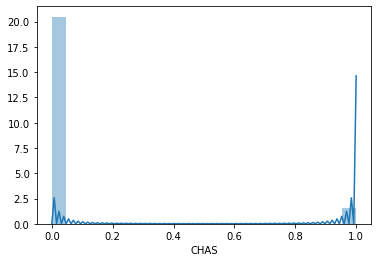

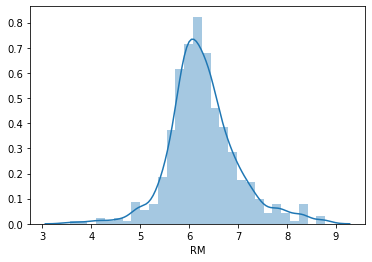

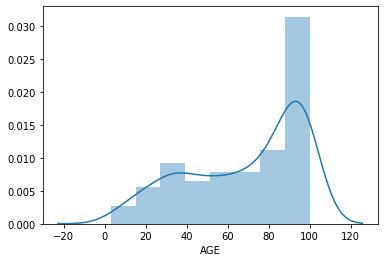

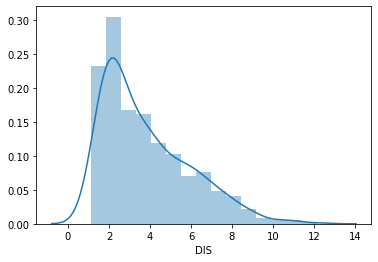

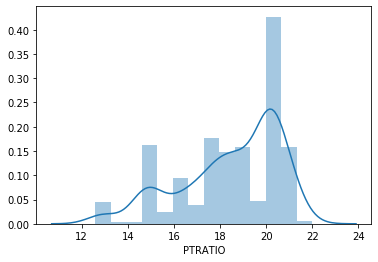

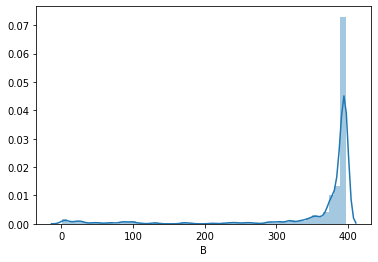

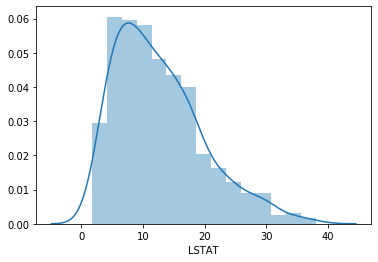

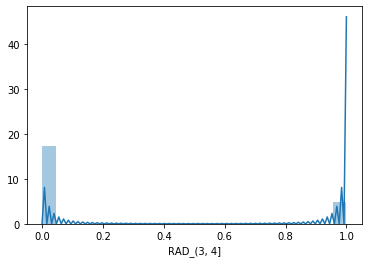

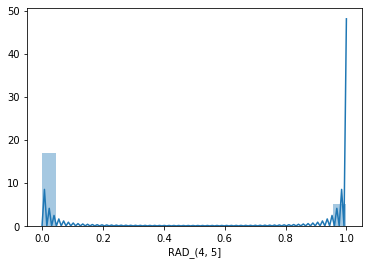

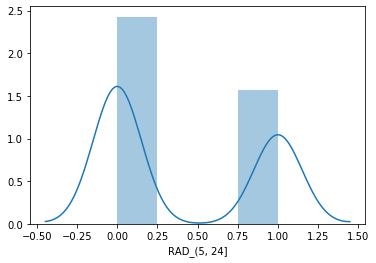

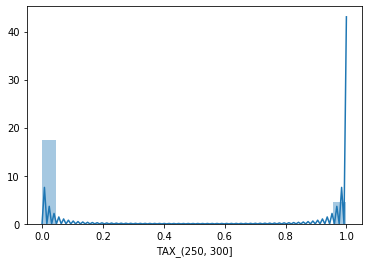

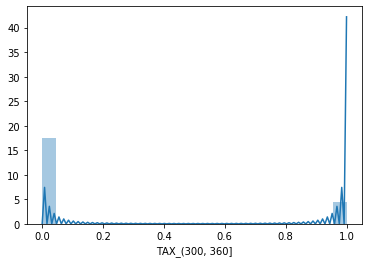

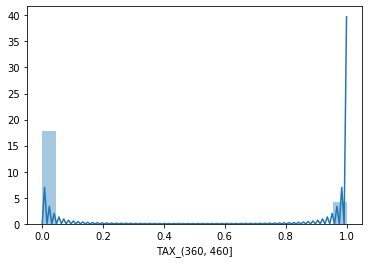

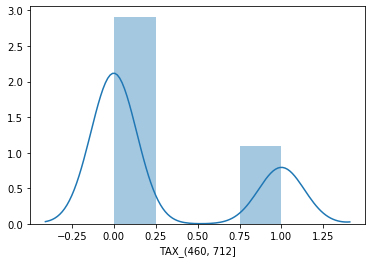

In [12]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

for col in boston_features.columns:
    sns.distplot(boston_features[col])
    plt.show();
# boston_features.plot(kind='hist')

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

In [38]:
boston_features

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,69.1,2.4786,21.0,391.99,9.67,0,0,0,1,0,0,0
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,21.0,396.90,9.08,0,0,0,1,0,0,0
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,21.0,396.90,5.64,0,0,0,1,0,0,0
504,0.10959,0.0,11.93,0.0,6.794,89.3,2.3889,21.0,393.45,6.48,0,0,0,1,0,0,0


In [42]:
#remove columns RAD* TAX*
df=boston_features
tt=list(df.filter(regex='TAX'))
tt
# boston_cont=df[df.columns.drop()]
# df.columns.drop()

['TAX_(250, 300]', 'TAX_(300, 360]', 'TAX_(360, 460]', 'TAX_(460, 712]']

In [58]:
#remove columns RAD* TAX* and 'CHAS'  (categorical variables)
print(   df.columns.drop(  list(df.filter(regex='TAX'))    )    )
df2=df[df.columns.drop(  list(df.filter(regex='TAX'))    ) ]
df2=df2[df2.columns.drop(  list(df.filter(regex='RAD'))    ) ]
df2.drop('CHAS',axis=1)
df2.head()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT', 'RAD_(3, 4]', 'RAD_(4, 5]', 'RAD_(5, 24]'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33


In [60]:
print(df2.columns)
df2.describe()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,6.284634,68.574901,3.795043,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.702617,28.148861,2.105710,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,3.561000,2.900000,1.129600,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,5.885500,45.025000,2.100175,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,6.208500,77.500000,3.207450,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,6.623500,94.075000,5.188425,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,8.780000,100.000000,12.126500,22.000000,396.900000,37.970000


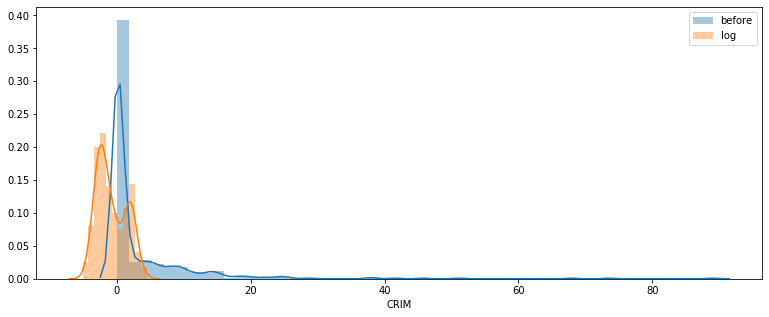

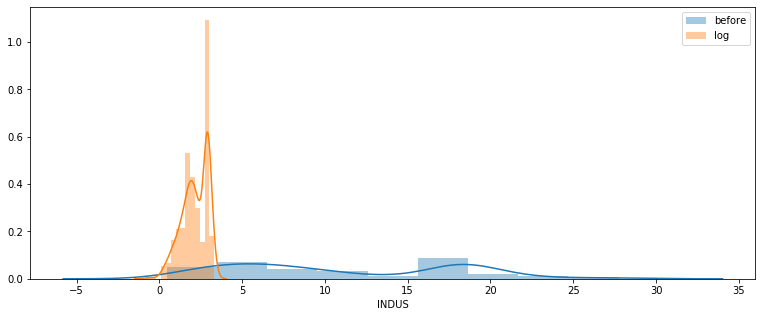

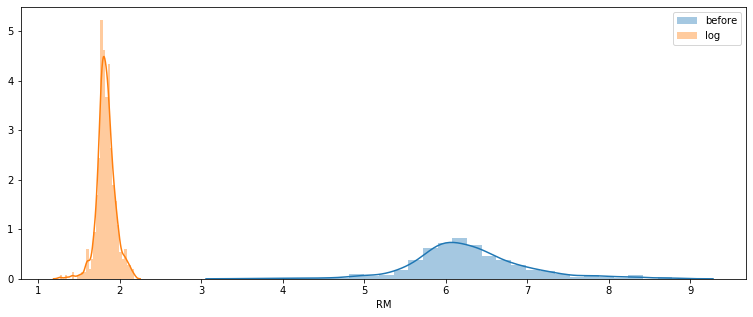

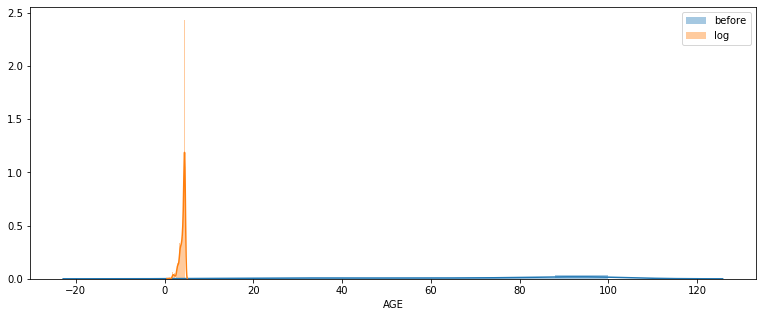

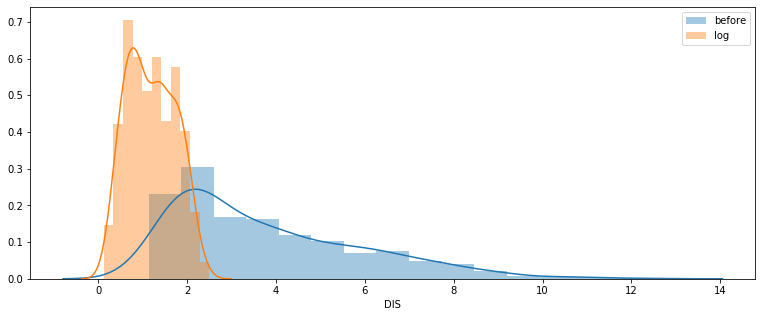

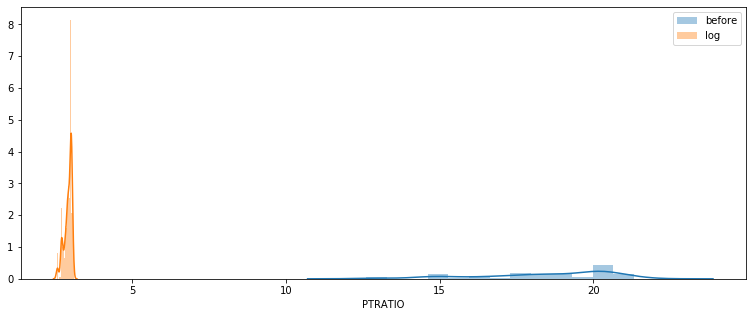

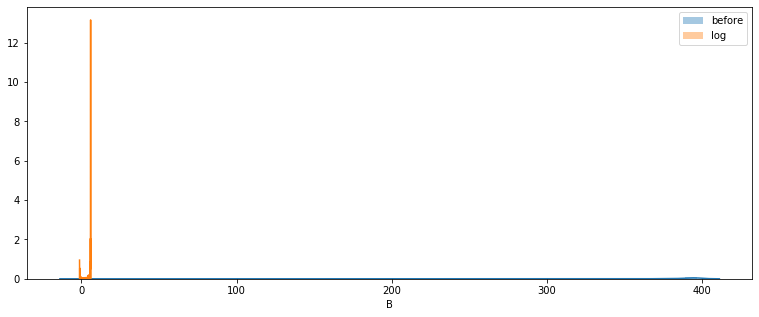

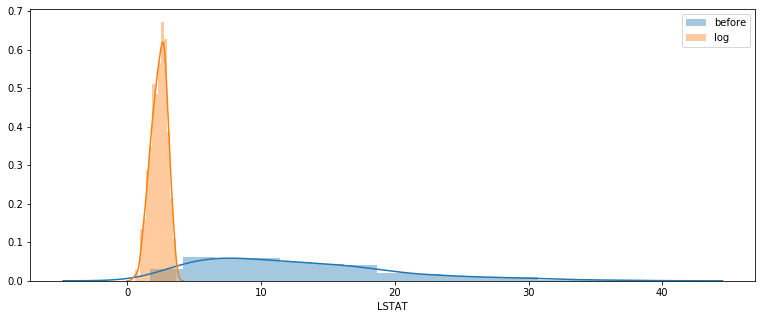

In [74]:
# visualize distributions of continuous variables >0 columns before and after log transformation
import numpy as np

for col in ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT']:
    plt.figure(figsize=(13,5))
    sns.distplot(df2[col],norm_hist=True,label='before')
    sns.distplot(np.log(df2[col]),norm_hist=True,label='log')
    plt.legend(),
    plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C11E05F080>,
      dtype=object)

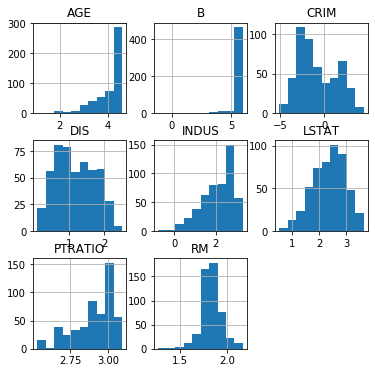

In [71]:
df3=pd.DataFrame([])
for col in ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B','LSTAT']:
    df3[col]=np.log(df2[col])

df3.hist(figsize = [6,6])

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [76]:
# Your code here
df2['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [92]:
# Your code here
# we keep log transformed data for all but AGE and B.
listo = list(df2.columns.drop('ZN'))
listo
#['CRIM', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
features_final = pd.DataFrame([])
features_final['CRIM'] = (df3['CRIM'] - df3['CRIM'].min())/(df3['CRIM'].max()-df3['CRIM'].min())
features_final['INDUS'] = (df3['INDUS'] - df3['INDUS'].mean())/(np.sqrt(np.var(df3['INDUS'])))
features_final['AGE'] = (df2['AGE'] - df2['AGE'].mean())/(df2['AGE'].max()-df3['AGE'].min())
features_final['PTRATIO'] = (df3['PTRATIO'])/(np.linalg.norm(df3['PTRATIO']))


In [93]:
features_final

,CRIM,INDUS,AGE,PTRATIO
0,0.000000,-1.704344,-0.034112,0.041664
1,0.153211,-0.263239,0.104362,0.043976
2,0.153134,-0.263239,-0.075553,0.043976
3,0.171005,-1.778965,-0.230200,0.044729
4,0.250315,-1.778965,-0.145296,0.044729
...,...,...,...,...
501,0.240099,0.410792,0.005307,0.046501
502,0.206118,0.410792,0.082125,0.046501
503,0.236926,0.410792,0.226664,0.046501
504,0.298671,0.410792,0.209481,0.046501


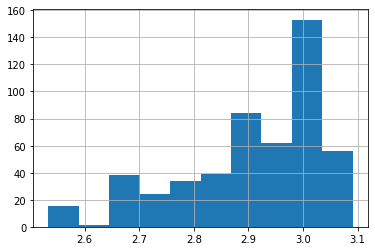

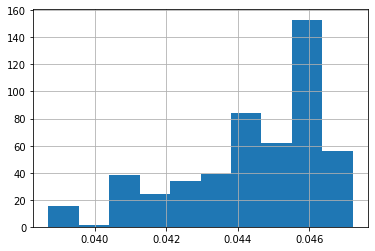

In [94]:
df3['PTRATIO'].hist()
plt.show();
features_final['PTRATIO'].hist()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!